# EVALUATION: Behavioral Duration with LMEM

In [1]:
import json

import pandas as pd
from matplotlib import pyplot as plt
from utils.utils import *

%run utils/LMEM_helpers.ipynb

C:\Users\maure\AppData\Roaming\Python\Python311\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


Lade nötiges Paket: Matrix



Attache Paket: 'lmerTest'

Das folgende Objekt ist maskiert 'package:lme4':

    lmer

Das folgende Objekt ist maskiert 'package:stats':

    step



ciTools version 0.6.1 (C) Institute for Defense Analyses



Attache Paket: 'nlme'

Das folgende Objekt ist maskiert 'package:lme4':

    lmList

In addition: Warning message:
Paket 'nlme' wurde unter R Version 4.3.3 erstellt 


Lade nötiges Paket: mgcv
This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.
Lade nötiges Paket: plotfunctions
Loaded package itsadug 2.4 (see 'help("itsadug")' ).
In addition: Warning messages:
1: Paket 'itsadug' wurde unter R Version 4.3.3 erstellt 
2: Paket 'plotfunctions' wurde unter R Version 4.3.3 erstellt 


### Load behavioral data

In [2]:
# Snippet data
behavioral_data = pd.read_csv(get_behavioral_data_path(
    final_data_exclusion=True, analysis_prep=True), sep=SEPARATOR, index_col=False, dtype={PARTICIPANT: str})
display(behavioral_data)
print(behavioral_data.dtypes)

,Snippet,Fixation_Start,End,Start,Duration,Answer,Correctness,Rating,right_answer,possible_wrong_answers,...,HDF_index,Participant,start_event,Block,Block_Index,Stimulus_id,Trial_No,Block_No,In_Block_No,Duration_log
0,16-obf-v0,130.144131,165.194542,135.137310,30.057232,3,0,1,7,5;3,...,0.0,P003,12,1,1,Stimulus/S 12,1,1,1,3.403103
1,5-clean-v0,174.369258,203.895033,179.370753,24.524280,false,0,1,true,false,...,0.0,P003,11,1,2,Stimulus/S 11,2,1,2,3.199664
2,61-clean-v0,211.250803,221.093158,216.250725,4.842433,4,1,1,4,2;0,...,0.0,P003,11,1,3,Stimulus/S 11,3,1,3,1.577417
3,13-clean-v0,228.432896,237.992304,233.416647,4.575657,5,1,1,5,6;3,...,0.0,P003,11,1,4,Stimulus/S 11,4,1,4,1.520750
4,10-obf-v0,245.032454,264.358911,250.001624,14.357288,1,1,0,1,0;2,...,0.0,P003,12,1,5,Stimulus/S 12,5,1,5,2.664258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,18-clean-v2,650.097955,671.641398,655.097237,16.544161,6,1,1,6,4;5,...,7.0,P106,11,3,20,Stimulus/S 11,68,3,20,2.806033
1723,54-obf-v2,678.104435,687.740039,683.096211,4.643827,6,0,1,0,6;2,...,7.0,P106,12,3,21,Stimulus/S 12,69,3,21,1.535539
1724,9-clean-v2,694.153446,707.572308,699.128912,8.443396,false,1,1,false,true,...,7.0,P106,11,3,22,Stimulus/S 11,70,3,22,2.133385
1725,12-obf-v2,713.678701,726.539764,718.661568,7.878196,4,1,1,4,3;2,...,7.0,P106,12,3,23,Stimulus/S 12,71,3,23,2.064099


Snippet                    object
Fixation_Start            float64
End                       float64
Start                     float64
Duration                  float64
Answer                     object
Correctness                 int64
Rating                      int64
right_answer               object
possible_wrong_answers     object
number                     object
variant                    object
version                    object
Langhout AoC_category      object
AoC_category               object
Condition                  object
HDF_index                 float64
Participant                object
start_event                 int64
Block                       int64
Block_Index                 int64
Stimulus_id                object
Trial_No                    int64
Block_No                    int64
In_Block_No                 int64
Duration_log              float64
dtype: object


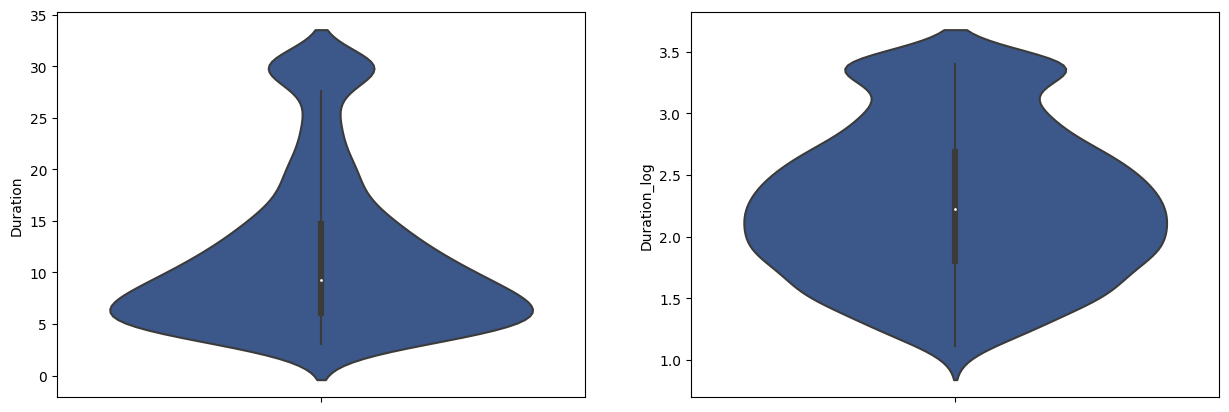

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(behavioral_data, y=BEHAVIORAL_COLUMN_DURATION, ax=ax1,)
sns.violinplot(behavioral_data, y=BEHAVIORAL_COLUMN_DURATION_LOG, log_scale=True, ax=ax2)
plt.show()

### Create models for confusion influence level

#### Duration

In [4]:
# Duration: Gaussian on log values
res2 = create_glmer_in_R(
    f'{BEHAVIORAL_COLUMN_DURATION_LOG} ~ 1 + {CONDITION} + ' +
    f'(1 + {CONDITION} | {PARTICIPANT}) + ' +
    f'(1 + {CONDITION} | {SNIPPET_COLUMN_NUMBER})',
    behavioral_data, description='duration confusion base model log gaussian')
# --> significant effect of confusion

Duration_log ~ 1 + Condition + (1 + Condition | Participant) + (1 + Condition | number)
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: formula
   Data: data

REML criterion at convergence: 2136.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5490 -0.6500 -0.0627  0.5981  3.3002 

Random effects:
 Groups      Name               Variance Std.Dev. Corr 
 Participant (Intercept)        0.079005 0.28108       
             Conditionconfusing 0.002131 0.04616  0.08 
 number      (Intercept)        0.123842 0.35191       
             Conditionconfusing 0.005583 0.07472  -0.27
 Residual                       0.180261 0.42457       
Number of obs: 1727, groups:  Participant, 24; number, 24

Fixed effects:
                   Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         2.23142    0.09306 42.03500  23.978   <2e-16 ***
Conditionconfusing  0.07711    0.02718 17.18848   2.837   0.0113 *  
---
Signif. codes:  

In [ ]:
# Duration: Gaussian on log values with trial number and confusion in random
res2 = create_glmer_in_R(
    f'{BEHAVIORAL_COLUMN_DURATION_LOG} ~ 1 + {CONDITION} * Block_No * In_Block_No + ' +
    f'(1 + {CONDITION} | {PARTICIPANT}) + ' +
    f'(1 + {CONDITION} | {SNIPPET_COLUMN_NUMBER})',
    behavioral_data, description='duration confusion block_no in_block_no 3wise log gaussian')

Duration_log ~ 1 + Condition * Block_No * In_Block_No + (1 + Condition | Participant) + (1 + Condition | number)
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: formula
   Data: data

REML criterion at convergence: 1829.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3093 -0.6759 -0.0274  0.5920  4.0442 

Random effects:
 Groups      Name               Variance Std.Dev. Corr 
 Participant (Intercept)        0.079826 0.28253       
             Conditionconfusing 0.003885 0.06233  0.00 
 number      (Intercept)        0.125095 0.35369       
             Conditionconfusing 0.008262 0.09090  -0.28
 Residual                       0.144913 0.38067       
Number of obs: 1727, groups:  Participant, 24; number, 24

Fixed effects:
                                          Estimate Std. Error         df
(Intercept)                              2.744e+00  1.195e-01  1.128e+02
Conditionconfusing                       2.530e-01  1.04

In [6]:
# simplification Runde 1: 3wise interaction rauswerfen
res2 = create_glmer_in_R(
    f'{BEHAVIORAL_COLUMN_DURATION_LOG} ~ 1 + {CONDITION} * Block_No + {CONDITION} * In_Block_No + Block_No * In_Block_No + ' +
    f'(1 + {CONDITION} | {PARTICIPANT}) + ' +
    f'(1 + {CONDITION} | {SNIPPET_COLUMN_NUMBER})',
    behavioral_data, description='duration confusion block_no in_block_no all 2wise log gaussian')

Duration_log ~ 1 + Condition * Block_No + Condition * In_Block_No + Block_No * In_Block_No + (1 + Condition | Participant) + (1 + Condition | number)
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: formula
   Data: data

REML criterion at convergence: 1820

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2990 -0.6772 -0.0349  0.5986  4.0185 

Random effects:
 Groups      Name               Variance Std.Dev. Corr 
 Participant (Intercept)        0.079848 0.28257       
             Conditionconfusing 0.003891 0.06238  0.00 
 number      (Intercept)        0.125088 0.35368       
             Conditionconfusing 0.008236 0.09075  -0.28
 Residual                       0.144850 0.38059       
Number of obs: 1727, groups:  Participant, 24; number, 24

Fixed effects:
                                 Estimate Std. Error         df t value
(Intercept)                     2.768e+00  1.107e-01  8.352e+01  25.011
Conditionconfusing     

In [7]:
# simplification Runde 2: 2wise interaction {CONDITION} * In_Block_No rauswerfen
res2 = create_glmer_in_R(
    f'{BEHAVIORAL_COLUMN_DURATION_LOG} ~ 1 + {CONDITION} * Block_No + Block_No * In_Block_No + ' +
    f'(1 + {CONDITION} | {PARTICIPANT}) + ' +
    f'(1 + {CONDITION} | {SNIPPET_COLUMN_NUMBER})',
    behavioral_data, description='duration confusion block_no in_block_no 2 2wise with b gaussian final')
# with aic = -1033.7478601 best model in round 2, no more rounds due to all factors being significant

Duration_log ~ 1 + Condition * Block_No + Block_No * In_Block_No + (1 + Condition | Participant) + (1 + Condition | number)
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: formula
   Data: data

REML criterion at convergence: 1811

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3096 -0.6632 -0.0264  0.5986  4.0630 

Random effects:
 Groups      Name               Variance Std.Dev. Corr 
 Participant (Intercept)        0.079794 0.28248       
             Conditionconfusing 0.003895 0.06241  0.00 
 number      (Intercept)        0.125167 0.35379       
             Conditionconfusing 0.008269 0.09094  -0.28
 Residual                       0.144848 0.38059       
Number of obs: 1727, groups:  Participant, 24; number, 24

Fixed effects:
                              Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                  2.787e+00  1.090e-01  7.861e+01  25.574  < 2e-16
Conditionconfusing           1.754e-0